In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Lecture 4 - Regression
---

### Content

1. Intro to regression
2. Assessing the goodness of fit

### Learning Outcomes

At the end of this lecture, you should be able to:

* describe the purpose of linear regression
* perform introductory regression model fitting using python libraries
* explain the degree of fit of a linear regression model


---

---

## Linear Regression - An Introduction

Often in real world applications we need to understand how the value of one variable is affected or determined by one or several other variables. 

This not only helps us to **understand and explain** the relationships of existing data and get a grasp of the situation, but it also enables us to make **predictions on future data**.

We may for example want to know:

* How does sales volume change with changes in price. How is this affected by changes in the weather?

* How does the amount of a drug absorbed vary with dosage and with body weight of patient?  Does it depend on blood pressure?

* How are the conversions on an e-commerce website affected by two different page titles in an A/B comparison? 

* How does the energy released by an earthquake vary with the depth of it's epicenter?

* How is the interest rate charged on a loan affected by credit history and by loan amount?

* What exam mark is a student likely to achieve given their previous assignment marks?

If we can find a **pattern** that accurately describes the relationship between these variables, then we can predict the latter, given the former. Eg. Given a persons credit rating (x1) and the requested loan amount (x2), what will the likely interest rate (y) be?

Answering the above questions, requires us to create a **model** which describes the pattern in the data.  

A model is a mathematical formula where one variable (response, usually $y$) varies depending on one or more independent variables (covariates, usually $x_i$). For example, the total number of Facebook friends a person has ($y$) might be related to the number of hours $x$ a person spends on Facebook a day.

One of the common and simplest models we can create is a **Linear Model**. With a linear model we make a big assumption that one response variable changes linearly with the changes in one or two other variables. 


While this is a big and simplistic assumption, it turns out that many real world problems can be modeled usefully in this way and the model thus works quite well.  Often data that don't appear to have a linear relationship can be transformed using simple mappings so that they do show a linear relationship.  This is very powerful and accordingly Linear Models have wide applicability. 

Note that linear modeling involves numerical and not categorical outcomes. Creating a Linear Model involves a technique known as **Linear Regression**. Given numerical problems, experimenting initially with linear regression is a wise choice before moving to other methods at subsequent attempts to find better fits to the problem if needed.

Linear Regression is one of the foundational tools of Data Science. It is the first **machine learning algorithm** we will look at from the perspective of how to use it and interpret it, rather than from the mathematical perspective.

---


In [2]:
import patsy

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
pd.options.display.max_columns = 50

In [5]:
from pylab import rcParams

sns.set(style="ticks")
#sns.set_style("whitegrid")
rcParams['figure.dpi'] = 180
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 7,5
rcParams['font.size'] = 15

In [6]:
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10

(0, 10)

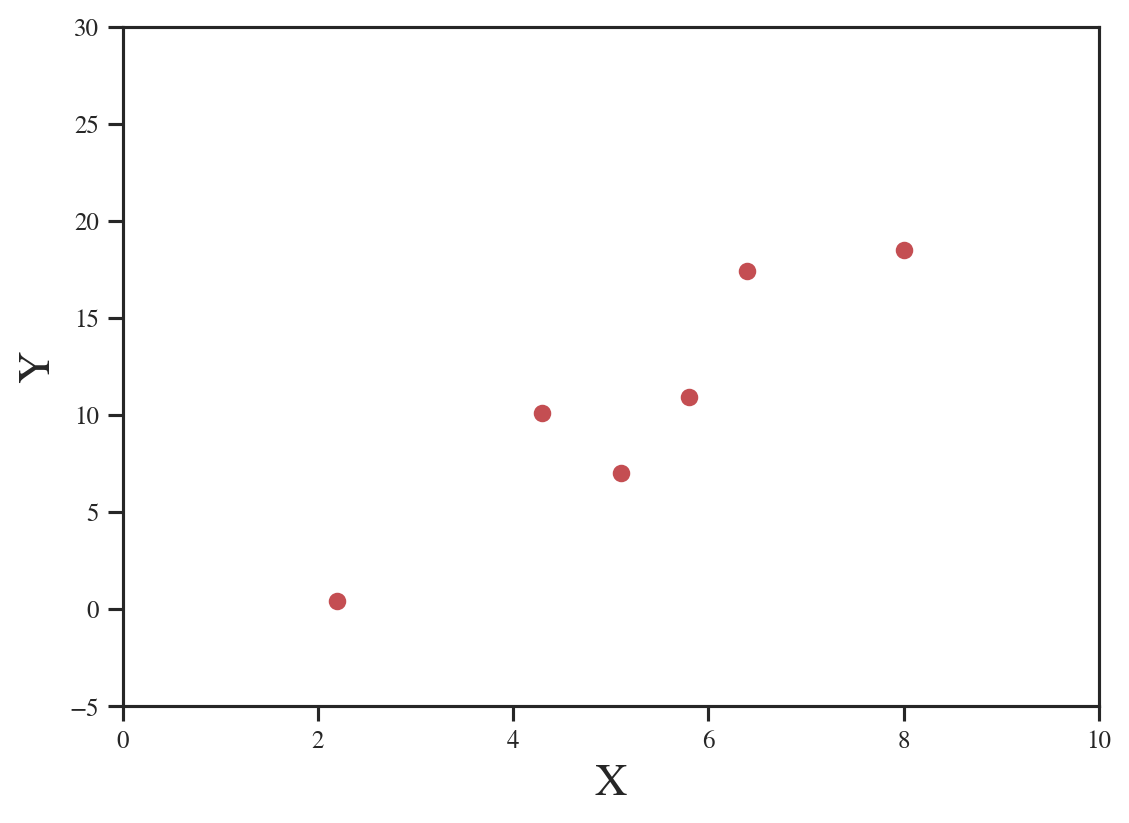

In [7]:
x = [2.2, 4.3, 5.1, 5.8, 6.4, 8.0]
y = [0.4, 10.1, 7.0, 10.9, 17.4, 18.5]
x = np.array(x)
y = np.array(y)
plt.plot(x,y,'ro')
plt.xlabel("X")
plt.ylabel("Y")
plt.ylim([-5,30])
plt.xlim([0,10])

We can build a model to characterize the relationship between $X$ and $Y$, recognizing that additional factors other than $X$ (the ones we have measured or are interested in) may influence the response variable $Y$.

Our task is to find the optimal values for the $y$ intercept $\beta_0$ and the coefficient for $x$ values $\beta_1$:


<div style="font-size: 150%;">  
$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$
</div>

where $\epsilon_i$ represents our expected error so that our predicted $y_i$ for a given $x_i$ will be in the vicinity of $y_i \pm \epsilon_i$.

The approximate equation for the line in this example is roughly $y = -4.35 + 3.0 \times x $. We will say this is our initial **model**. 

Text(0, 0.5, 'Y')

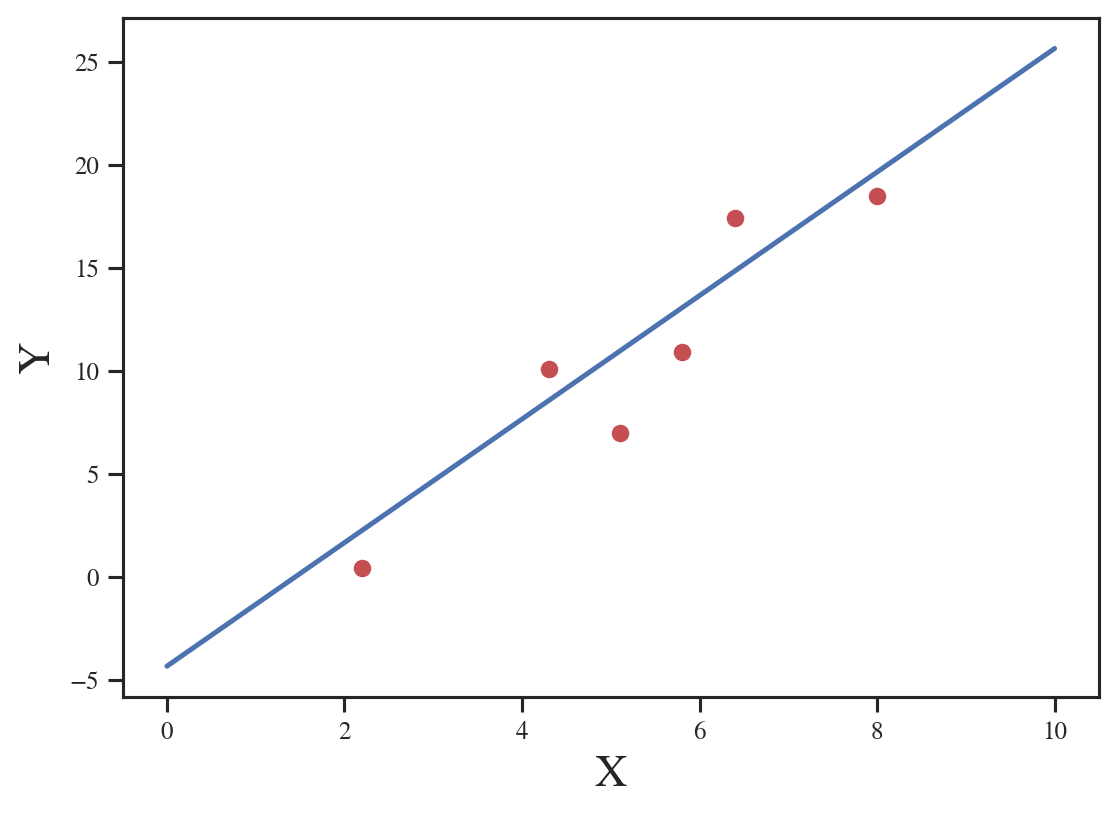

In [8]:
b0, b1 = (-4.35, 3.0)
plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10])
plt.xlabel("X")
plt.ylabel("Y")

## Model Assumptions:

Each model/classification algorithm comes with some assumptions regarding the data it is applied to, and it is important to be aware of these since they directly affect the efficacy of the generated model accuracy. Generating regression models using the least squares approach comes with the following three assumptions about the underlying data:

1. The relationship between the two variables should be **linear**.
2. The variance around the regression line is the same for all values of X - this is called **homoscedasticity**.
3. The *residuals* or the **errors of prediction are distributed normally** around the regression line.
4. The independent varialbes should not be correlated

If we believe that our data does not (strongly) violate the above assumptions, we can proceed with generating a linear regression model. There are a number of different libraries in Python which allow us to do this. 

In [9]:
from IPython.display import display, Image
Image(url='https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/132/2016/04/21214901/Figure7_12.png')


## Measuring the Goodness-of-fit

Once the model has been generated, the questions should then be raised: 

1. How well does the model fit the data?
2. How accurate and reliable is this model likely to be when predicting new data? 

In order to be able to give and a robust evaluation, we need to define a few terms which will allow us to quantify the above.



Below is the the formula that gives us the predicted values for $y$ given $x$.

<div style="font-size: 150%;">  
$\hat{y} = \beta_0 + \beta_1 x$
</div>

[2.2, 2.2] [0.4, 2.250000000000001]
[4.3, 4.3] [10.1, 8.549999999999999]
[5.1, 5.1] [7.0, 10.95]
[5.8, 5.8] [10.9, 13.049999999999999]
[6.4, 6.4] [17.4, 14.850000000000003]
[8.0, 8.0] [18.5, 19.65]


Text(8.2, 15.7, '$(y_i - \\hat{y}_i)$ = residual')

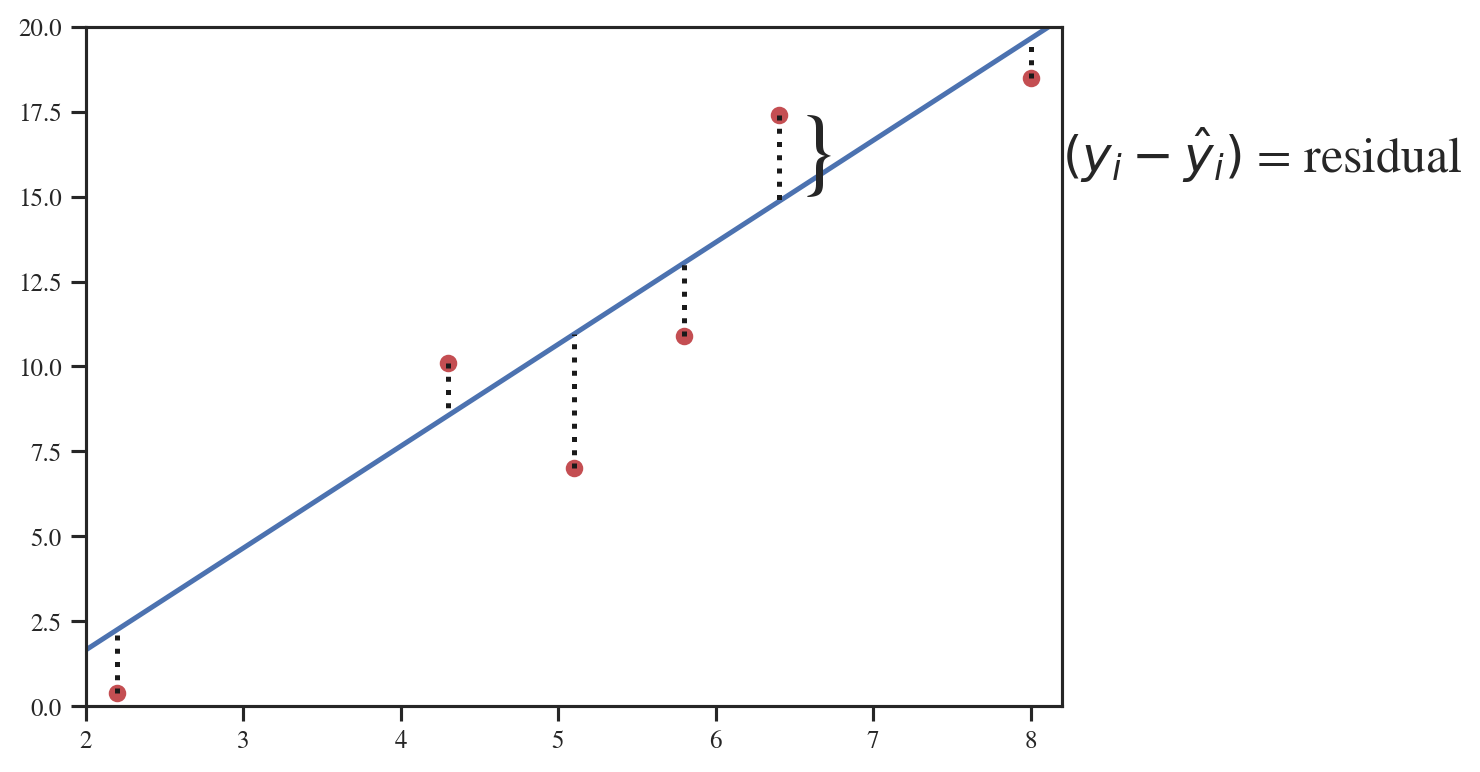

In [10]:
plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10])
for xi, yi in zip(x,y):
#     print([xi],yi)
    print([xi]*2, [yi, b0+b1*xi])
    plt.plot([xi]*2, [yi, b0+b1*xi], 'k:')
plt.xlim(2, 8.2); plt.ylim(0, 20) #设置x轴的数值显示范围。

plt.text(6.5, 15.5, r'}',    fontsize=38)
plt.text(8.2, 15.7, r'$(y_i - \hat{y}_i)$ = residual',    fontsize=20)

The difference between the true value of $y_i$ and the predicted value of $\hat{y}_i$ is the error of the regression line and is called the *residual*. The least squares procedure for fitting a regression line, optimizes the line so that the sum of squared residuals is minimized.

10.716666666666667
[2.2, 2.2] [0.4, 2.250000000000001]
[4.3, 4.3] [10.1, 8.549999999999999]
[5.1, 5.1] [7.0, 10.95]
[5.8, 5.8] [10.9, 13.049999999999999]
[6.4, 6.4] [17.4, 14.850000000000003]
[8.0, 8.0] [18.5, 19.65]


Text(8.2, 11.4, '$(\\hat{y}_i - \\bar{y})$')

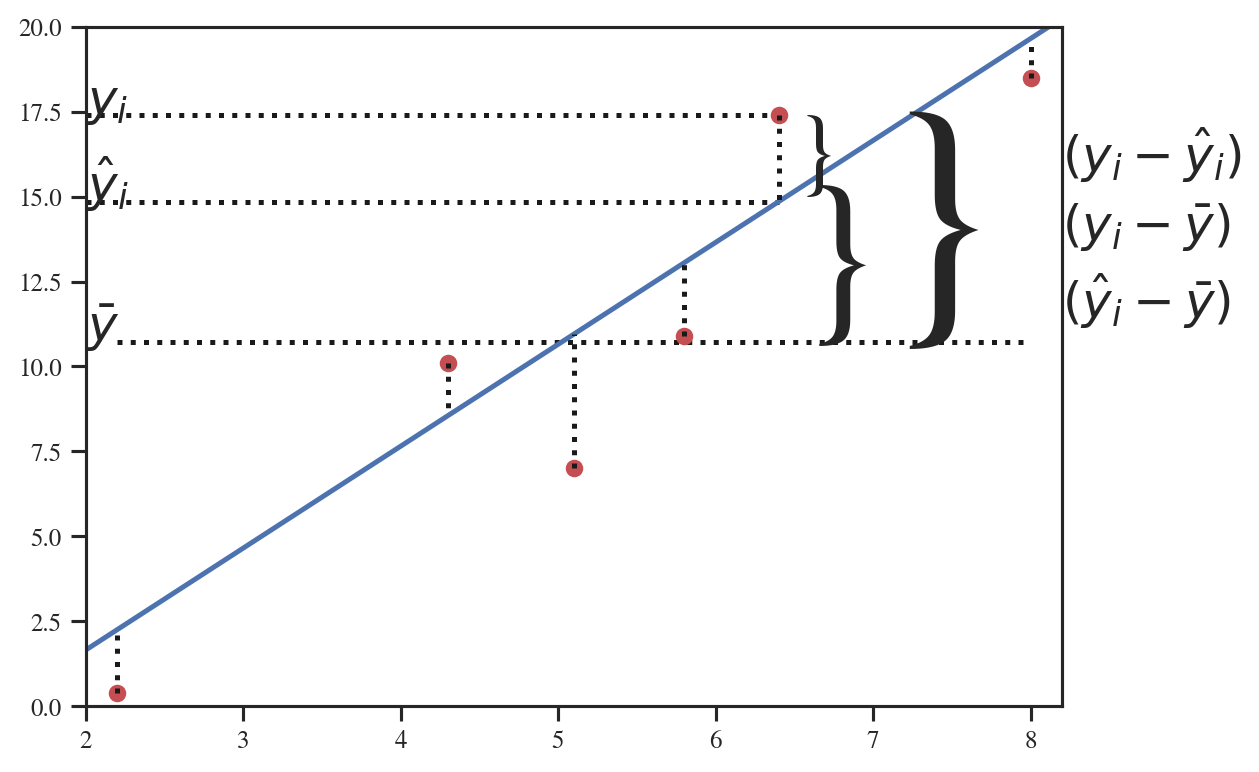

In [11]:
print(np.mean(y))
plt.plot( x, [np.mean(y)]*len(x),'k:')
plt.text(2, np.mean(y), r'$\bar{y}$',    fontsize=20)

plt.plot([2,6.4], [14.85, b0+b1*6.4], 'k:')
plt.text(2, b0+b1*6.4, r'$\hat{y}_i$',    fontsize=20)

plt.plot([2,6.4], [17.4]*2, 'k:')
plt.text(2, 17.4, r'$y_i$',    fontsize=20)

plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10])
for xi, yi in zip(x,y):
    print([xi]*2, [yi, b0+b1*xi])
    plt.plot([xi]*2, [yi, b0+b1*xi], 'k:')
plt.xlim(2, 8.2); plt.ylim(0, 20)

plt.text(6.5, 15.5, r'}',    fontsize=38)
plt.text(8.2, 15.7, r'$(y_i - \hat{y}_i)$',    fontsize=20)

plt.text(6.5, 11.6, r'}',    fontsize=75)
plt.text(8.2, 13.7, r'$(y_i - \bar{y})$',    fontsize=20)

plt.text(7, 12.0, r'}',    fontsize=110)
plt.text(8.2, 11.4, r'$(\hat{y}_i - \bar{y})$',    fontsize=20)

The above graph allows us to visually see how the total variation in $y$ can be explained by $x$, given the generated linear regression model. 


<div style="font-size: 120%;">  
$$ (y_i - \bar{y}) = (\hat{y}_i - \bar{y}) + (y_i - \hat{y}_i) $$
</div>

The above quantities are squared and summed for each value of observations. Squaring serves two purposes: (1) to prevent positive and negative values from canceling each other out and (2) to strongly penalize large deviations. Whether the latter is a good thing or not depends on the goals of the analysis. This give us the following:

<div style="font-size: 120%;">  
$$ SS_{Total} = \sum_{i=1}^N(y_i - \bar{y})^2  $$
</div>

<div style="font-size: 120%;">  
$$ SS_{Regression} = \sum_{i=1}^N(\hat{y}_i - \bar{y})^2  $$
</div>

<div style="font-size: 120%;">  
$$ SS_{Residual} = \sum_{i=1}^N(y_i - \hat{y}_i)^2  $$
</div>

The total proportion of all the variation in $y$, explained by $x$ can therefore be defined as:

<div style="font-size: 120%;">  
$$R^2 = \frac{SS_{Regression}}{SS_{Total}} $$  
</div>

often called the **coefficient of determination** and used as the primary criterion for summarizing how well a linear regression model fits the data.

If the predictions ($\hat{y}$) are close to the actual values ($y$), we would expect $R^2$ to be close to 1. On the other hand, if the predictions are unrelated to the actual values, then $R^2 = 0$ . In all cases, $R^2$ lies between 0 and 1.

The $R^2$ value is commonly used, often incorrectly, in forecasting. There are no set rules of what a good $R^2$ value is and typical values of $R^2$ depend on the type of data used. 

Sometimes a regression line will still be useful and yield statistically significant results even when $R^2$ is low. This means even when $R^2$ is low, low P values still indicate a real relationship between the significant predictors and the response variable. However, the low $R^2$ models will be less useful for precise predictions.

Validating a model’s out-of-sample (test set) forecasting performance  is much better than measuring the in-sample (training set) $R^2$ value. More on this and how to set up robust experiments, later in the course.



### Root Mean Squared Error###

Another way to express how far typical points or observations are, on average, from your regression line is through the Root Mean Squared Error (RMSE) or root-mean-square deviation (RMSD). 

Essentially, the **RMSE is the standard deviation of the residuals** or the measure of the spread of the residuals around the regression line on the vertical axis. Since the RMS error is measured on the same scale with the same units as $y$, the RMSE can be interpreted in the same manner as the standard deviation. This means that 68% of the residuals can be expected to fall within $1 \pm$RMSE, meanwhile 95% can be expected to fall within $2 \pm$RMSE.

RMSE can be quantified as:

<div style="font-size: 120%;">  
   $$ \operatorname{RMSE}=\sqrt{\frac{\sum_{i=1}^n (y - \hat y_i)^2}{N}} $$
</div>

A shortcut for calculating the RMSE if you have the $R^2$ is as follows:
<div style="font-size: 120%;">  
$$ RMSE = \sigma_y \times \sqrt{1 - R^2}   $$
</div>

where $\sigma_y$ is the standard deviation of the quantity you are trying to predict and $R^2$ is the correlation coefficient. 

## Example

Given a set of student grades in assignments/course work, is it possible to predict the score they will achieve in the exam?

The example below is based on an anonymized dataset from a class. The values have been permuted with noise and thus no single observation represents a real student's assignment/exam grade. However, while the permutation and the introduction of noise has weakened the real relationships to some degree, the trends have nonetheless been preserved and are effective for analysis.

A# refer to assignment numbers, CW is the total course work (sum of assignment scores) and the exam represents the numeric score achieved.

In [12]:
#regression library
import statsmodels.formula.api as smf

grades = pd.read_csv("../datasets/grades_prediction_mode.csv", index_col=0)
grades.head()

,A1,A2,A3,A4,A5,CW,Exam,Total,Grade,Mode
0,3.5,5.50,7.5,6.5,7.5,30.50,30.0,60.50,B-,INT
1,2.5,4.50,3.2,3.8,NaN,14.00,10.0,24.00,E,INT
2,4.0,5.25,7.1,10.2,11.5,38.05,31.0,69.05,B,INT
3,4.0,NaN,3.0,7.7,9.5,24.20,23.0,47.20,R,INT
4,4.5,4.75,7.4,10.3,8.8,35.75,40.0,75.75,B+,EXT


Let's first take a look at the medians, min and max values for each of the course assessments to see if there are some patterns:

**Exercise:** Use pivot tables to generate a table which summarizes all the medians, min and max values for all the assessments based on the final student grade. Can we tell if there are any obvious trends?

In [13]:
grades.pivot_table(index=["Grade"],values = ["A1","A2","A3","A4","CW","Exam"],aggfunc = [min,max,np.median])


min                                  max                           \
         A1    A2   A3    A4     CW    Exam   A1    A2    A3    A4     CW   
Grade                                                                       
A      4.00  4.25  7.0  8.80  35.05  46.000  4.5  5.50  7.50  10.5  39.50   
A+     4.50  5.00  7.2  8.90  37.50  50.000  4.5  5.50  7.50  10.5  39.50   
A-     0.50  4.75  4.9  9.20  32.90  43.000  4.5  5.50  7.50  10.5  39.30   
B      3.00  3.00  3.0  6.25  25.95  28.000  4.5  5.50  7.50  10.5  39.30   
B+     3.25  3.85  4.0  7.75  31.65  40.000  4.5  5.50  7.50  10.5  39.10   
B-     3.00  4.25  2.5  4.25  20.45  23.000  4.5  5.50  7.50   9.7  38.45   
C      3.50  3.60  2.9  3.80  16.80  21.000  4.5  5.50  5.50   8.4  32.05   
C+     2.75  3.05  2.5  4.25  12.80  26.000  4.5  5.40  6.10   8.5  31.05   
D      3.10  0.70  1.9  2.50   3.10  12.000  4.5  5.00  4.25   7.3  20.50   
DNC    0.50  2.60  0.7  1.50   3.30     NaN  4.5  5.50  7.00   9.8  26.40   
E      0.25  1.25  0.0  1.80   3.50   1.001  4.0  4.75  4.50   4.0  14.00   
R      3.40  2.25  1.9  4.30  15.30  13.000  4.5  5.50  6.70   8.5  35.00   

            median                                     
       Exam     A1     A2    A3      A4      CW  Exam  
Grade                                                  
A      52.0  4.500  5.500  7.40  10.300  38.700  48.0  
A+     57.0  4.500  5.250  7.50  10.500  38.900  52.0  
A-     51.0  4.500  5.000  7.00  10.250  36.850  46.0  
B      45.0  4.500  5.250  6.70  10.100  35.000  37.0  
B+     49.0  4.500  5.000  7.20   8.725  34.980  43.0  
B-     43.0  4.000  4.750  6.40   7.200  29.800  33.0  
C      34.0  4.000  4.750  4.10   7.250  21.750  27.0  
C+     42.0  3.625  4.250  4.25   7.250  24.725  31.5  
D      32.0  3.625  4.500  3.15   5.750  16.100  22.0  
DNC     NaN  3.525  4.250  4.80   6.100  11.000   NaN  
E      16.0  3.500  4.375  2.80   3.800  10.550  11.0  
R      30.0  4.000  4.250  3.30   7.525  23.225  23.5

If we wanted to drill deeper and see if there were any differences of note between the performances of internal and extramural students, we could do so using pivots.

**Exercise:** Use pivot tables to generate the same pivots as above, except, add Mode as an additional index: if there are any obvious trends?

In [14]:
grades.pivot_table(index=["Grade","Mode"],values = ["A1","A2","A3","A4","CW","Exam"],aggfunc = [min,max,np.median])


min                                    max                    \
              A1    A2    A3     A4     CW    Exam   A1    A2    A3    A4   
Grade Mode                                                                  
A     EXT   4.00  4.25  7.00   8.80  35.05  46.000  4.5  5.50  7.50  10.5   
      INT   4.00  5.50  7.40  10.40  36.90  46.000  4.5  5.50  7.50  10.5   
A+    EXT   4.50  5.00  7.20   8.90  37.50  50.000  4.5  5.50  7.50  10.5   
      INT   4.50  5.50  7.50  10.50  39.50  50.000  4.5  5.50  7.50  10.5   
A-    EXT   4.50  4.75  6.70   9.80  35.90  43.000  4.5  5.50  7.50  10.4   
      INT   0.50  5.00  4.90   9.20  32.90  46.000  4.5  5.50  7.50  10.5   
B     EXT   3.00  4.75  6.70   6.25  27.00  28.000  4.5  5.50  7.50  10.5   
      INT   3.75  3.00  3.00   7.10  25.95  29.000  4.5  5.50  7.50  10.5   
B+    EXT   4.00  4.50  6.70   8.30  32.25  40.000  4.5  5.50  7.50  10.5   
      INT   3.25  3.85  4.00   7.75  31.65  41.000  4.5  5.50  7.50  10.2   
B-    EXT   3.00  4.25  3.90   4.40  20.45  31.000  4.5  5.00  7.40   8.3   
      INT   3.25  4.25  2.50   4.25  25.85  23.000  4.5  5.50  7.50   9.7   
C     EXT   4.00  4.75  2.90   3.80  21.45  27.000  4.5  5.00  3.30   4.4   
      INT   3.50  3.60  3.30   6.90  16.80  21.000  4.5  5.50  5.50   8.4   
C+    EXT   3.50  5.00  3.30   4.80  12.80  33.000  4.5  5.00  3.80   4.8   
      INT   2.75  3.05  2.50   4.25  14.65  26.000  4.5  5.40  6.10   8.5   
D     EXT   3.25  0.70  2.80   7.30   6.65  22.000  4.4  5.00  3.70   7.3   
      INT   3.10  3.50  1.90   2.50   3.10  12.000  4.5  5.00  4.25   5.9   
DNC   EXT   0.50  2.60  0.70   1.50   3.30     NaN  4.5  5.50  7.00   9.8   
E     EXT   0.25  1.25  2.40   1.80   8.50   1.001  4.0  4.50  4.50   1.8   
      INT   2.30  4.25  0.00   3.80   3.50  10.000  3.8  4.75  3.20   4.0   
R     EXT   4.00  4.25  1.90   4.30  15.30  24.000  4.0  5.00  4.00   6.6   
      INT   3.40  2.25  2.65   7.40  22.25  13.000  4.5  5.50  6.70   8.5   

                        median                                     
               CW  Exam     A1     A2    A3      A4      CW  Exam  
Grade Mode                                                         
A     EXT   39.50  52.0  4.500  5.500  7.40  10.100  38.700  48.0  
      INT   39.30  48.0  4.250  5.500  7.45  10.450  38.100  47.0  
A+    EXT   39.50  57.0  4.500  5.250  7.45  10.500  38.850  52.5  
      INT   39.50  50.0  4.500  5.500  7.50  10.500  39.500  50.0  
A-    EXT   39.30  46.0  4.500  5.000  7.20  10.200  37.900  45.0  
      INT   36.20  51.0  4.000  5.500  5.10  10.300  36.100  46.0  
B     EXT   39.20  45.0  4.500  5.250  7.00  10.100  36.250  38.0  
      INT   39.30  43.0  4.250  5.000  6.45   9.750  34.800  37.0  
B+    EXT   39.10  46.0  4.500  4.750  7.40  10.000  36.300  43.0  
      INT   37.30  49.0  4.500  5.000  6.80   8.500  34.450  43.0  
B-    EXT   34.10  43.0  4.500  4.750  6.90   6.800  28.000  33.0  
      INT   38.45  37.0  4.000  4.875  4.95   8.150  30.600  32.5  
C     EXT   23.50  29.0  4.250  4.875  3.10   4.100  22.475  28.0  
      INT   32.05  34.0  4.000  4.625  5.00   7.475  21.750  27.0  
C+    EXT   23.00  42.0  4.000  5.000  3.55   4.800  17.900  37.5  
      INT   31.05  41.0  3.625  4.250  4.30   7.500  26.500  29.5  
D     EXT   17.45  25.0  4.000  2.250  3.25   7.300  11.800  22.0  
      INT   20.50  32.0  3.500  4.750  3.15   4.625  17.450  19.0  
DNC   EXT   26.40   NaN  3.525  4.250  4.80   6.100  11.000   NaN  
E     EXT   12.20  12.0  4.000  3.500  3.45   1.800  12.000   9.0  
      INT   14.00  16.0  3.000  4.500  1.60   3.900   9.550  11.5  
R     EXT   20.65  30.0  4.000  4.250  3.10   4.400  16.550  29.0  
      INT   35.00  24.0  4.000  4.625  3.50   7.700  25.800  21.0

Let's turn to a graphical representation of this data cloud and visually examine if there are strong relationships between the different features in this dataset.

**Exercise:** Generate a graph that visualises the pair-wise relationships between all the features in the dataset. Are there correlations? Which ones are weak/strong? Why?

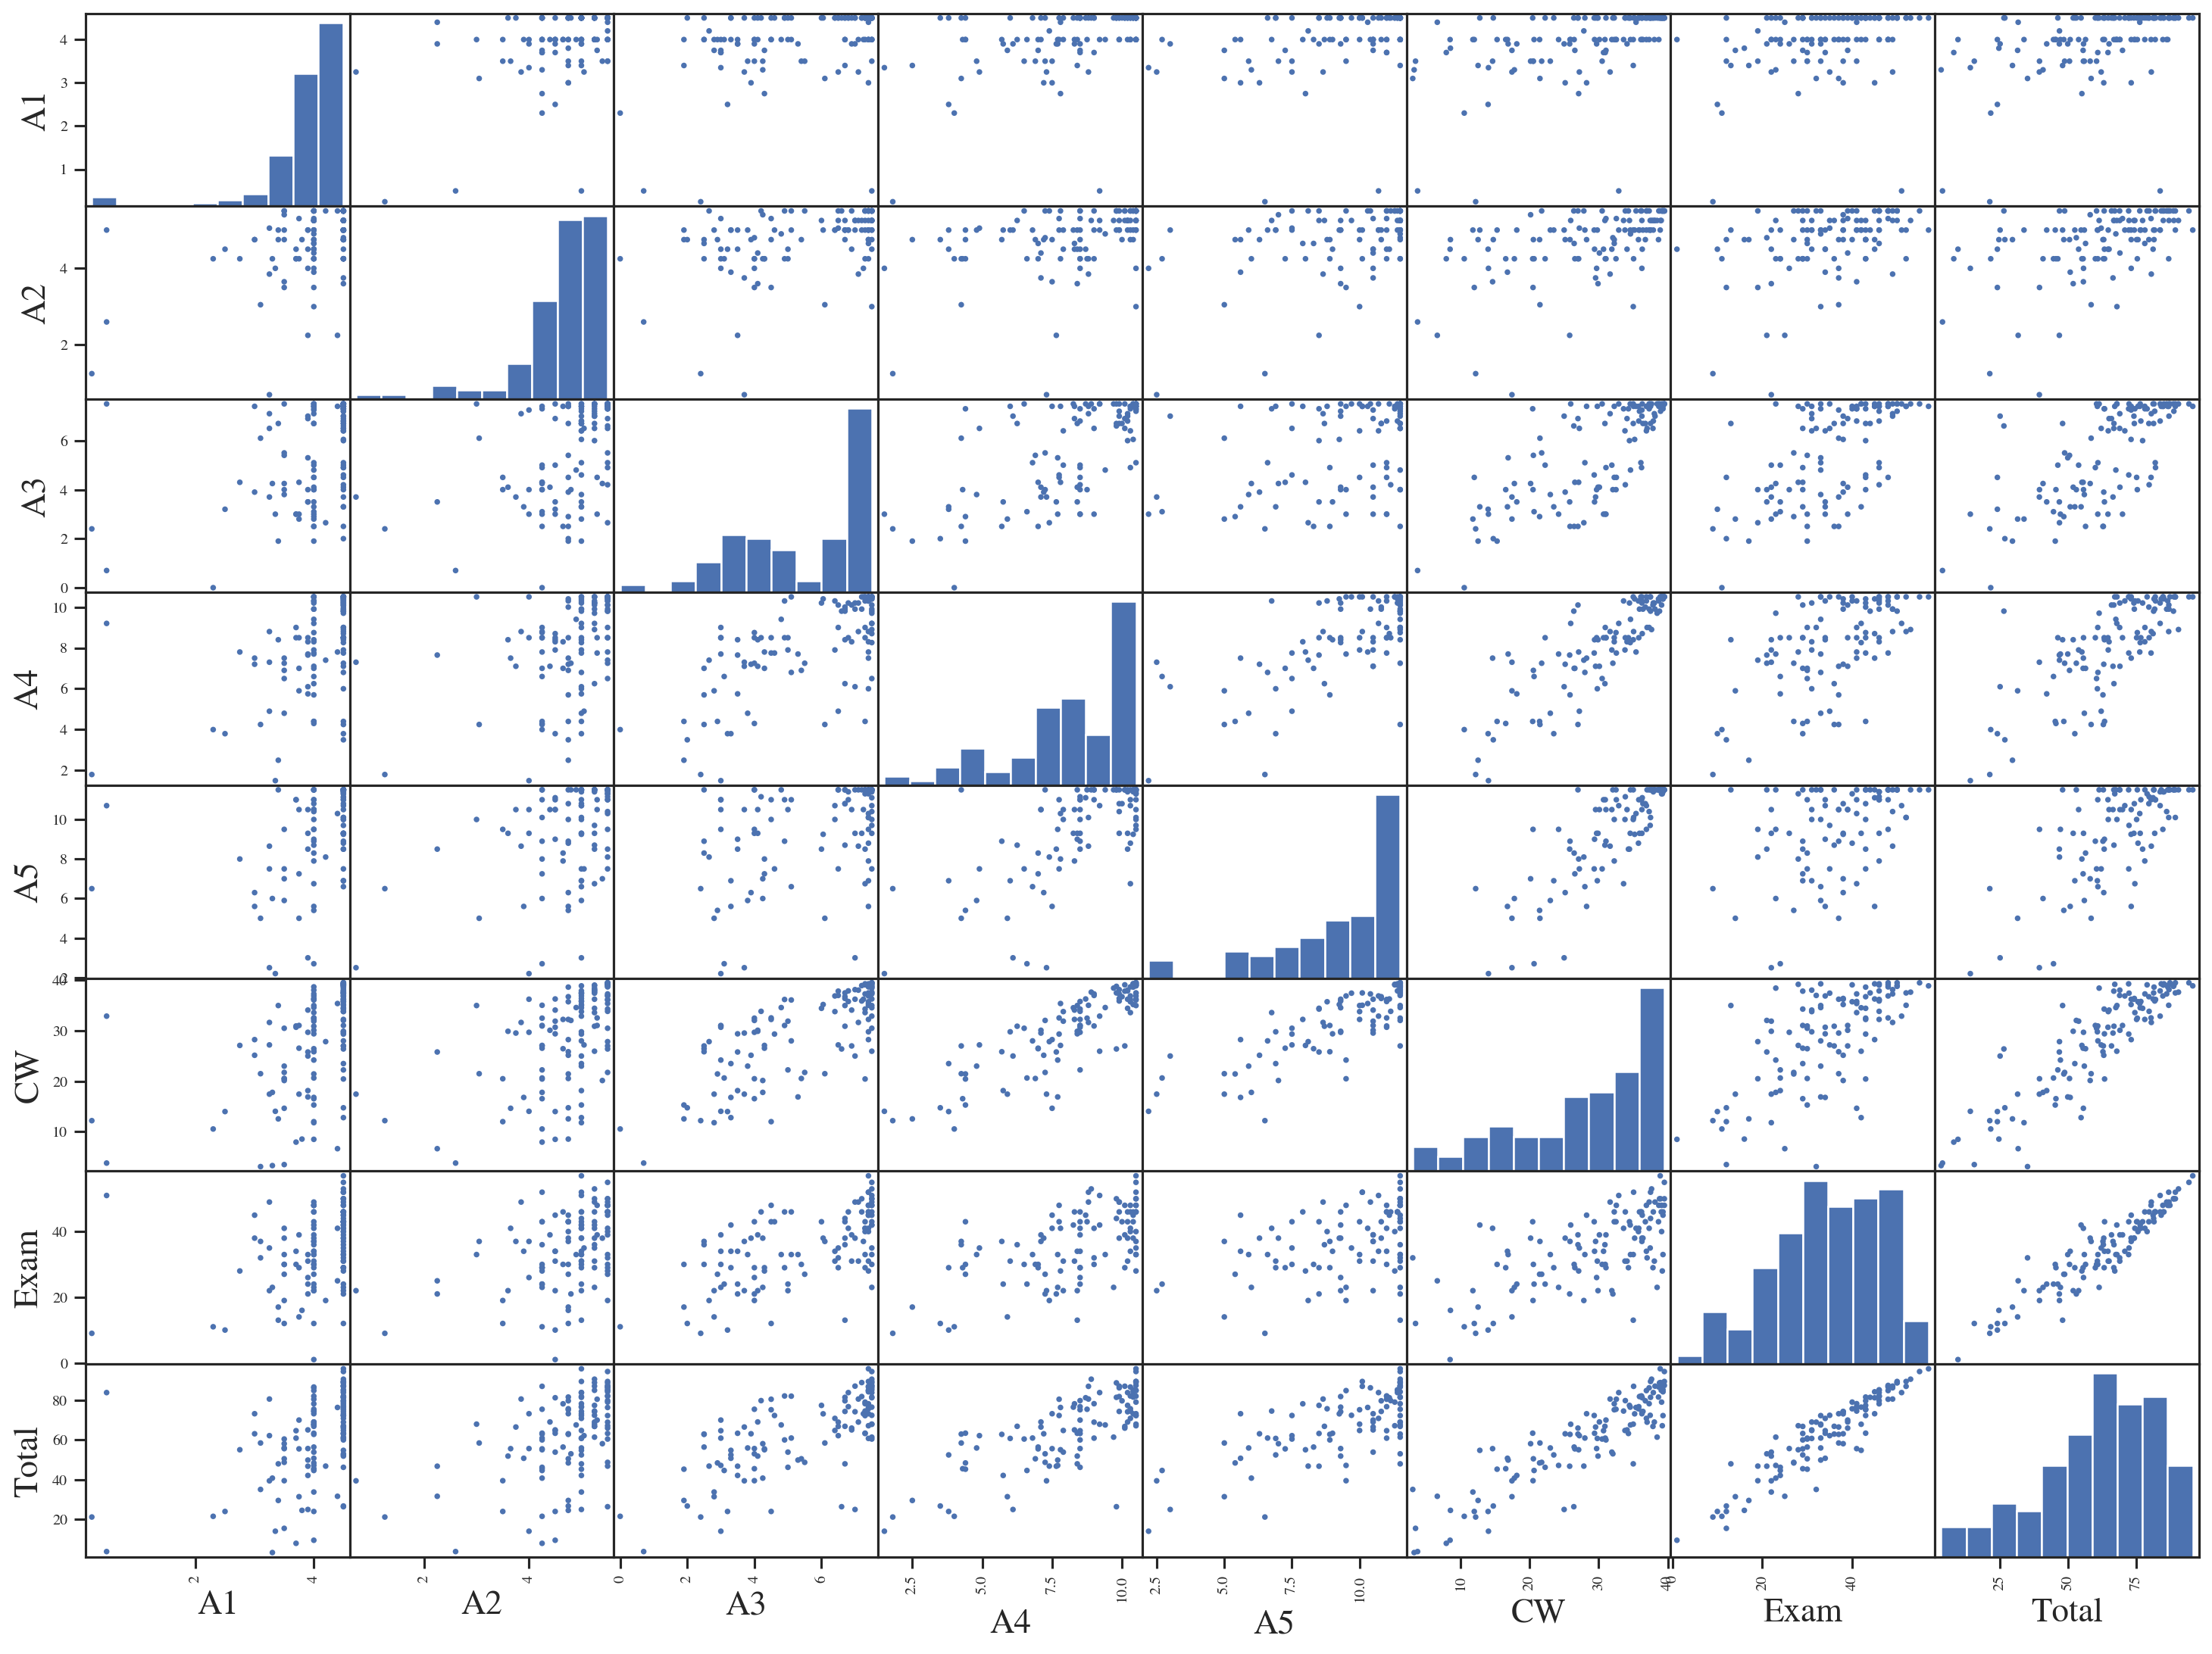

In [15]:
# pd.plotting.scatter_matrix(grades.corr())
_ = pd.plotting.scatter_matrix(grades, alpha=1, figsize=(20, 15), diagonal='hist')


Correlation is a statistical technique that numerically describes the strength of how strongly pairs of variables are related.

We can  calculate the strengths of the correlations from the above in a matrix format:

In [16]:
grades.corr()#相关系数矩阵

,A1,A2,A3,A4,A5,CW,Exam,Total
A1,1.000000,0.464685,0.382809,0.458047,0.389768,0.497669,0.329278,0.463103
A2,0.464685,1.000000,0.435899,0.402199,0.436249,0.531480,0.419396,0.493696
A3,0.382809,0.435899,1.000000,0.673946,0.404791,0.760577,0.623255,0.706977
A4,0.458047,0.402199,0.673946,1.000000,0.678972,0.856847,0.596316,0.756806
A5,0.389768,0.436249,0.404791,0.678972,1.000000,0.821625,0.418337,0.697616
CW,0.497669,0.531480,0.760577,0.856847,0.821625,1.000000,0.664341,0.893246
Exam,0.329278,0.419396,0.623255,0.596316,0.418337,0.664341,1.000000,0.930145
Total,0.463103,0.493696,0.706977,0.756806,0.697616,0.893246,0.930145,1.000000


Now that we see that there are relationships in the data and in particular between the CW as a predictor and Exam as a response variable, we can generate a regression model, visualise it, and evaluate its reliability as follows:

In [17]:
x = pd.DataFrame({'CW': np.linspace(grades.CW.min(), grades.CW.max(), len(grades.CW))})
x

,CW
0,3.100000
1,3.386614
2,3.673228
3,3.959843
4,4.246457
...,...
123,38.353543
124,38.640157
125,38.926772
126,39.213386


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Exam   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     43.56
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           2.88e-09
Time:                        10:29:32   Log-Likelihood:                -318.60
No. Observations:                  91   AIC:                             641.2
Df Residuals:                      89   BIC:                             646.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3357      5.127      0.846      0.400      -5.851      14.523
CW             1.0090      0.153      6.600      0.000       0.705       1.313
==============================================================================
Omnibus:                        7.811   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.449
Skew:                          -0.680   Prob(JB):                       0.0241
Kurtosis:                       3.342   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

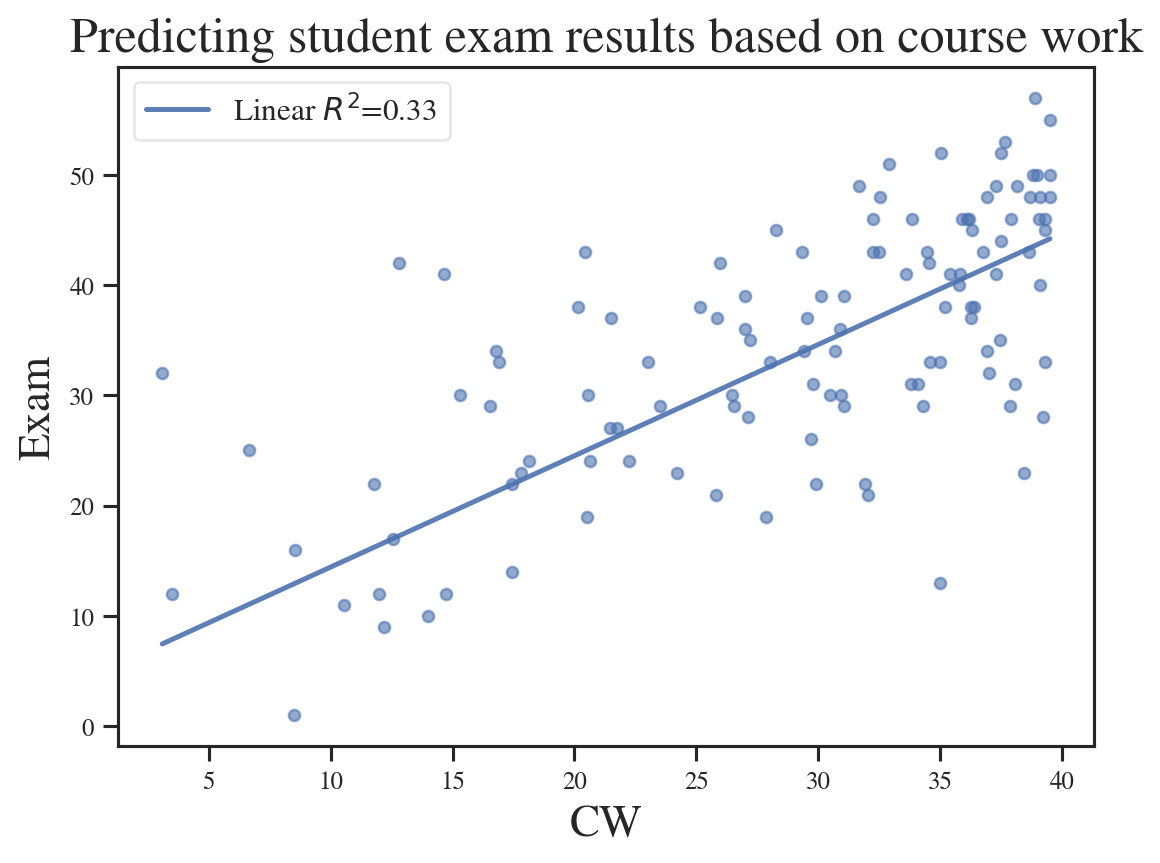

In [18]:
#generate the x-axis values that are in range for the CW values
x = pd.DataFrame({'CW': np.linspace(grades.CW.min(), grades.CW.max(), len(grades.CW))})
#generate the model which uses the course work score to predict the exan mark - the ols() return the generated model
mod = smf.ols(formula='Exam ~ 1 + CW', data=grades.dropna()).fit()

#plot the actual data
plt.scatter(grades.CW, grades.Exam, s=20, alpha=0.6)
plt.xlabel('CW')
plt.ylabel('Exam')

#render the regression line by predicting the ys using the generated model from above
plt.plot(x.CW, mod.predict(x), 'b-', label='Linear $R^2$=%.2f' % mod.rsquared, alpha=0.9)

#give the figure a meaningful legend
plt.legend(loc='upper left', framealpha=0.5, prop={'size':'small'})
plt.title("Predicting student exam results based on course work", fontsize=20)

#display the model statistics describing the goodness of fit
mod.summary()

The explanation of the output table of statsmodels linear regression fit can be found here http://connor-johnson.com/2014/02/18/linear-regression-with-python/

**Exercise:** Describe what you see in the regression output and the model fit? How good of a fit is the model? Is the relationship between the variables significant? Is the model likely to be accurate for predictions?

Given the above regression model that we have generated, we can now make predictions about individual observations for whom we do not know what the true dependent variable value is.

Here is an example of a student who achieved 25/40 from the class course work, and we are going to predict what he would have achieved in his exam, given the above model:

In [19]:
#first create a series object with the value to predict
student_course_work = pd.Series(data={'CW':25})
student_course_work

CW    25
dtype: int64

In [20]:
mod.predict(student_course_work)

0    29.561168
dtype: float64

In [21]:
DataFrame

NameError: name 'DataFrame' is not defined

**Exercise:** Let's assume that you are now interested in finding out how well you can predict a student's overall total mark for a paper, based on their exam result. Write code that does this and consider the interpretation of your findings.

In [ ]:
grades.head()

In [ ]:
#generate the x-axis values that are in range for the CW values
x = pd.DataFrame({'Exam': np.linspace(grades.Exam.min(), grades.Exam.max(), len(grades.Exam))})
#generate the model which uses the course work score to predict the exan mark - the ols() return the generated model
mod = smf.ols(formula='Total ~ 1 + Exam', data=grades.dropna()).fit()

#plot the actual data
plt.scatter(grades.Exam, grades.Total, s=20, alpha=0.6)
plt.xlabel('Exam')
plt.ylabel('Total')

#render the regression line by predicting the ys using the generated model from above
plt.plot(x.Exam, mod.predict(x), 'b-', label='Linear $R^2$=%.2f' % mod.rsquared, alpha=0.9)

#give the figure a meaningful legend
plt.legend(loc='upper left', framealpha=0.5, prop={'size':'small'})
plt.title("Predicting student exam results based on course work", fontsize=20)

#display the model statistics describing the goodness of fit
mod.summary()


**Exercise:** Using the above model you generated, predict the total score students with the following exam marks [15, 40, 55] are likely to get.

In [ ]:
student_course_work = pd.DataFrame(data={'Exam': [15, 40, 55] })
mod.predict(student_course_work)


# How to Calculate the Line of Best Fit 

There are a number of ways to determine the regression line. Below is urguably the easiest approach (In the appendix of this notebook, a method of determining the regression line using gradient descent is demonstrated).

Source Wikipedia: <img style="background:white" src=https://wikimedia.org/api/rest_v1/media/math/render/svg/c142dc313a360d32591a184474122ac1de87be81 width=400>

The approach may seem complex at first glance, but can be broken down into just sums and squares of various quantities. 


**Exercise:** Implement a function that calculates the intercept and a single coefficient for values of x and y. 

In [ ]:
def basic_linear_regression(x, y):

    # calculate the length of x
    length = len(x)
    
    # Σx - calculate the sum of all values of x
    sum_x = sum(x)
    
    # Σy - calculate the sum of all values of y
    sum_y = sum(y)

    # Σx^2  - calculate the sum of all xs squared
    sum_x_squared = np.sum(np.square(x)) #sum(map(lambda a: a * a, x))

    #Σxy  - calculate the sum of the products of x * y
    sum_of_xy_products = np.sum(x * y) # sum([x[i] * y[i] for i in range(length)])

    # calculate
    # coefficient = (Σxy - (Σx * Σy) / len) / (Σx^2 - ( (Σx)^2 / len))
    coef = (sum_of_xy_products-(sum_x*sum_y)/length) /(sum_x_squared -(sum_x_squared/length))
    
    # calculate
    # intercept = (Σy - coef * Σx) / len
    intercept = (sum_y-coef*sum_x)/length
    
    return intercept, coef

In [ ]:
basic_linear_regression(grades.dropna().Exam.values, grades.dropna().Total.values)

## Regression Line Confidence Intervals

The **regression line is an estimation** of where the true model parameters should lie. 

Sometimes we would like to know what is the the **region in which the true model parameters lie given a certain confidence value**. For this we can define a confidence interval.

The confidence interval lets us define a window in which the true regression line is likely to be situated for example with a 95% confidence. Another way of thinking about this is that our result (whatever it is), can be estimated with a 95% chance of lying in this range.

For linear regression we can visually display a confidence interval in which we expect the true value to lie. 

Below is an example of a function defined by James Bagrow (http://nbviewer.ipython.org/url/bagrow.com/dsv/LEC10_notes_2014-02-13.ipynb) on how to calculate a specified confidence interval using Student's t Distribution:



In [22]:
import scipy

def linregress_CIs(xd,yd,conf=0.95):
    """Linear regression CIs FTW!"""
    alpha=1.-conf   # significance
    n = xd.size   # data sample size
    x = np.linspace(xd.min(),xd.max(),1000)
        
    # Predicted values from fitted model:
    a, b, r, p, err = scipy.stats.linregress(xd,yd)
    #print a #Slope
    #print b #Intercept
    #print r #Correlation coefficient. R-squared: r_value**2
    #print p
    #print err #Standard error of the estimated gradient.

    y = a*x+b
    
    sd = 1./(n-2.)*np.sum((yd-a*xd-b)**2)
    #print 'np.sum((yd-a*xd-b)**2):', np.sum((yd-a*xd-b)**2)
    #print 'sd:', sd
    sd = np.sqrt(sd)
    #print 'sqrt sd - RMSE:', sd
    sxd = np.sum((xd-xd.mean())**2) #SS total
    #print 'sxd',sxd
    sx  = (x-xd.mean())**2 # variance of each x
    #print sx
    
    # quantile of student's t distribution for p=1-alpha/2
    q = scipy.stats.t.ppf(1.-alpha/2, n-2) #分位点函数（CDF的逆） cdf：累计分布函数
    #print q
    # get the upper and lower CI:
    #print 'sx/sxd:', sx/sxd
    dy = q*sd*np.sqrt( 1./n + sx/sxd )
    #print 'dy:', dy
    yl = y-dy
    yu = y+dy
    
    return yl,yu,x

In [42]:
 mod.params[1]
grades.Exam
mod.params[1]*grades.Exam

0      39.769576
1      13.256525
2      41.095229
3      30.490008
4      53.026101
         ...    
123    27.838703
124    43.746534
125    50.374796
126    42.420881
127    29.164356
Name: Exam, Length: 128, dtype: float64

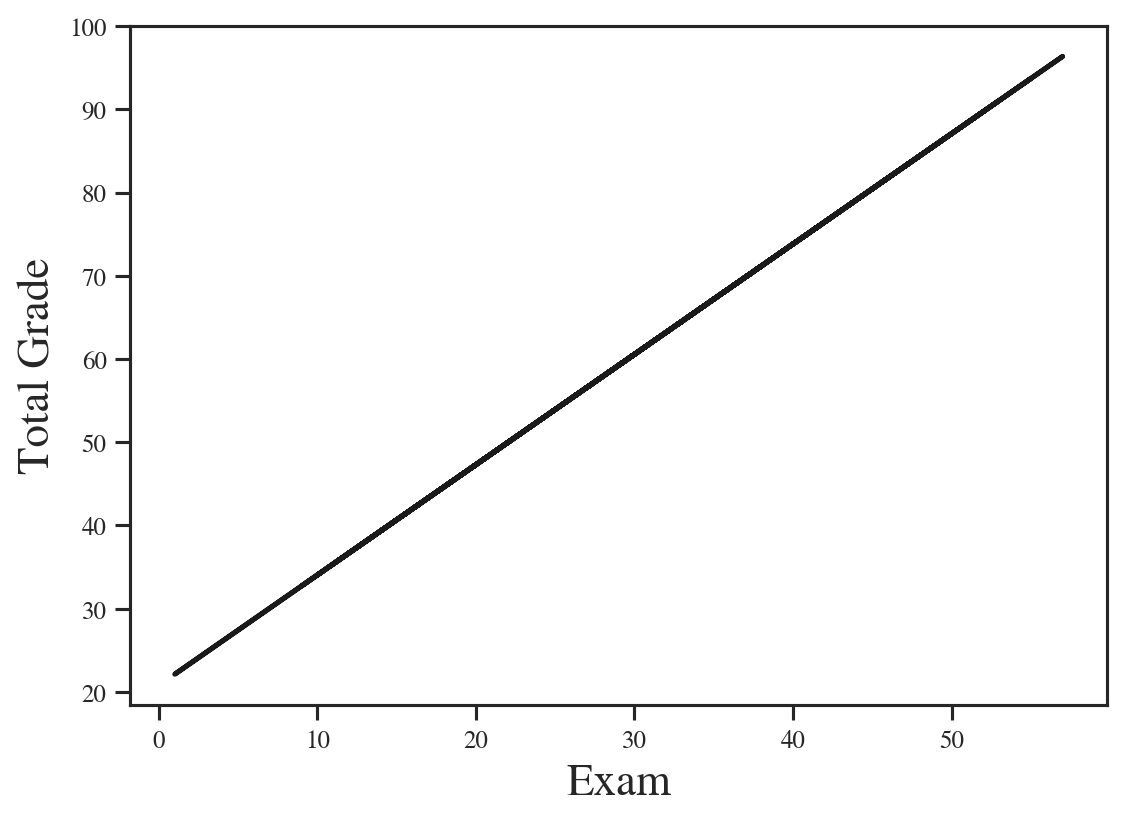

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     721.8
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.79e-44
Time:                        10:59:39   Log-Likelihood:                -267.14
No. Observations:                  91   AIC:                             538.3
Df Residuals:                      89   BIC:                             543.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.7912      1.922     10.817      0.000      16.972      24.610
Exam           1.3257      0.049     26.866      0.000       1.228       1.424
==============================================================================
Omnibus:                        2.126   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.761
Skew:                          -0.339   Prob(JB):                        0.415
Kurtosis:                       3.061   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
grades_no_NAN = grades.dropna()
# yl,yu,xd = linregress_CIs(grades_no_NAN.Exam.as_matrix(),grades_no_NAN.Total.as_matrix(), .95)
mod = smf.ols(formula='Total ~ 1 + Exam', data=grades.dropna()).fit()

plt.xlabel('Exam')
plt.ylabel('Total Grade')
# plt.plot(grades.Exam,grades.Total, 'o')
plt.plot(grades.Exam, mod.params[1]*grades.Exam+mod.params[0],'k-')
# plt.fill_between(xd, yl, yu, alpha=0.3, facecolor='blue',edgecolor='none')
plt.show()
mod.summary()


In [28]:
import scipy

def linear_regression_CI(coeff, std_err, n, conf=0.95):

    alpha=1.-conf   # significance
    # quantile of student's t distribution for p=1-alpha/2
    q = scipy.stats.t.ppf(1.-alpha/2, n-2)
    
    return q

In [29]:
ci = linear_regression_CI(1.3257, 0.049, 91, conf=0.95)
ci

1.9869786993737677

In [30]:
x = pd.DataFrame({'Exam': np.linspace(grades.Exam.min(), grades.Exam.max(), len(grades.Exam))})
mod.predict(x) - ci

0      20.131166
1      20.715695
2      21.300224
3      21.884754
4      22.469283
         ...    
123    92.028265
124    92.612795
125    93.197324
126    93.781853
127    94.366382
Length: 128, dtype: float64

In [31]:
x

,Exam
0,1.001000
1,1.441937
2,1.882874
3,2.323811
4,2.764748
...,...
123,55.236252
124,55.677189
125,56.118126
126,56.559063


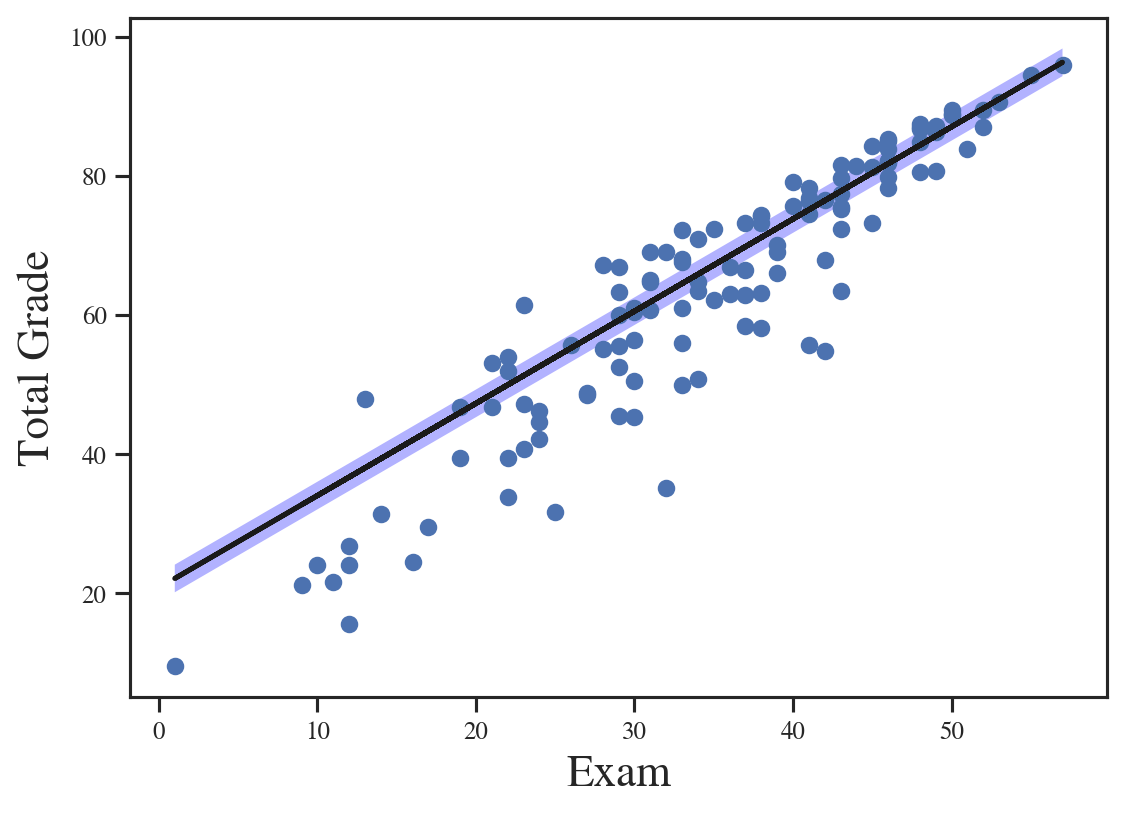

In [32]:
plt.xlabel('Exam')
plt.ylabel('Total Grade')
plt.plot(grades.Exam,grades.Total, 'o')
plt.plot(grades.Exam, mod.params[1]*grades.Exam+mod.params[0],'k-')
plt.fill_between(x.Exam.values, mod.predict(x)+ci, mod.predict(x)-ci, alpha=0.3, facecolor='blue',edgecolor='none')
plt.show()

In [33]:
grades_no_NAN = grades.dropna()
mod = smf.ols(formula='Total ~ 1 + Exam', data=grades.dropna()).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     721.8
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.79e-44
Time:                        10:29:59   Log-Likelihood:                -267.14
No. Observations:                  91   AIC:                             538.3
Df Residuals:                      89   BIC:                             543.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.7912      1.922     10.817      0.000      16.972      24.610
Exam           1.3257      0.049     26.866      0.000       1.228       1.424
==============================================================================
Omnibus:                        2.126   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.761
Skew:                          -0.339   Prob(JB):                        0.415
Kurtosis:                       3.061   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

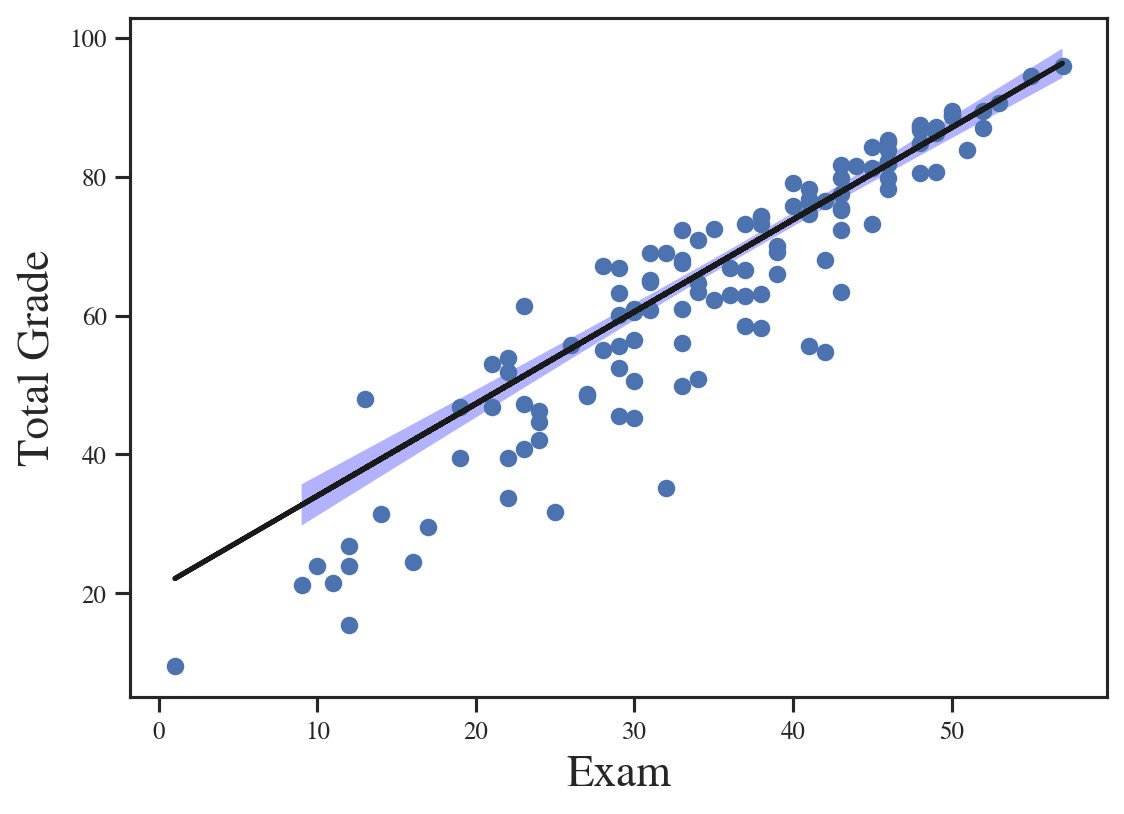

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     721.8
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.79e-44
Time:                        10:30:00   Log-Likelihood:                -267.14
No. Observations:                  91   AIC:                             538.3
Df Residuals:                      89   BIC:                             543.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.7912      1.922     10.817      0.000      16.972      24.610
Exam           1.3257      0.049     26.866      0.000       1.228       1.424
==============================================================================
Omnibus:                        2.126   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.761
Skew:                          -0.339   Prob(JB):                        0.415
Kurtosis:                       3.061   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
plt.xlabel('Exam')
plt.ylabel('Total Grade')
plt.plot(grades.Exam,grades.Total, 'o')
plt.plot(grades.Exam, mod.params[1]*grades.Exam+mod.params[0],'k-')
plt.fill_between(xd, yl, yu, alpha=0.3, facecolor='blue',edgecolor='none')
plt.show()
mod.summary()

The blue area is a 95% confidence interval on the line. **It does not mean that 95% of the data points fall inside the blue area**.

The  confidence bands are curved. This also does not mean that the confidence band includes the possibility of curves as well as straight lines. Rather, the curved lines are the boundaries of all possible straight lines that could be fit within this confidence interval.

Given the assumptions of linear regression, **you can be 95% confident that the two curved confidence bands enclose the true best-fit linear regression line**, leaving a 5% chance that the true line is outside those boundaries.

Many data points will be outside the 95% confidence bands. The confidence bands are 95% sure to contain the best-fit regression line. This is not the same as saying it will contain 95% of the data points.


**Exercise:** Generate a scatter plot matrix for the above student grade problem. Select a different combination of variables and build a regression model together with the confidence intervals using the function provided.

## Regression Line Prediction Bands

The **prediction bands identify the region that specifies where a given percentage of points should fall**. 

The **prediction band** deals specifically with where the **predictions** should fall, while the **confidence intervals** define where the true **regression line** should fall. 

Use prediction bands when your intent is to depict the variation in your data. Meanwhile, use confidence intervals to visually analyze how precisely your data define the best-fit line.


Text(0,0.5,'Total Grade')

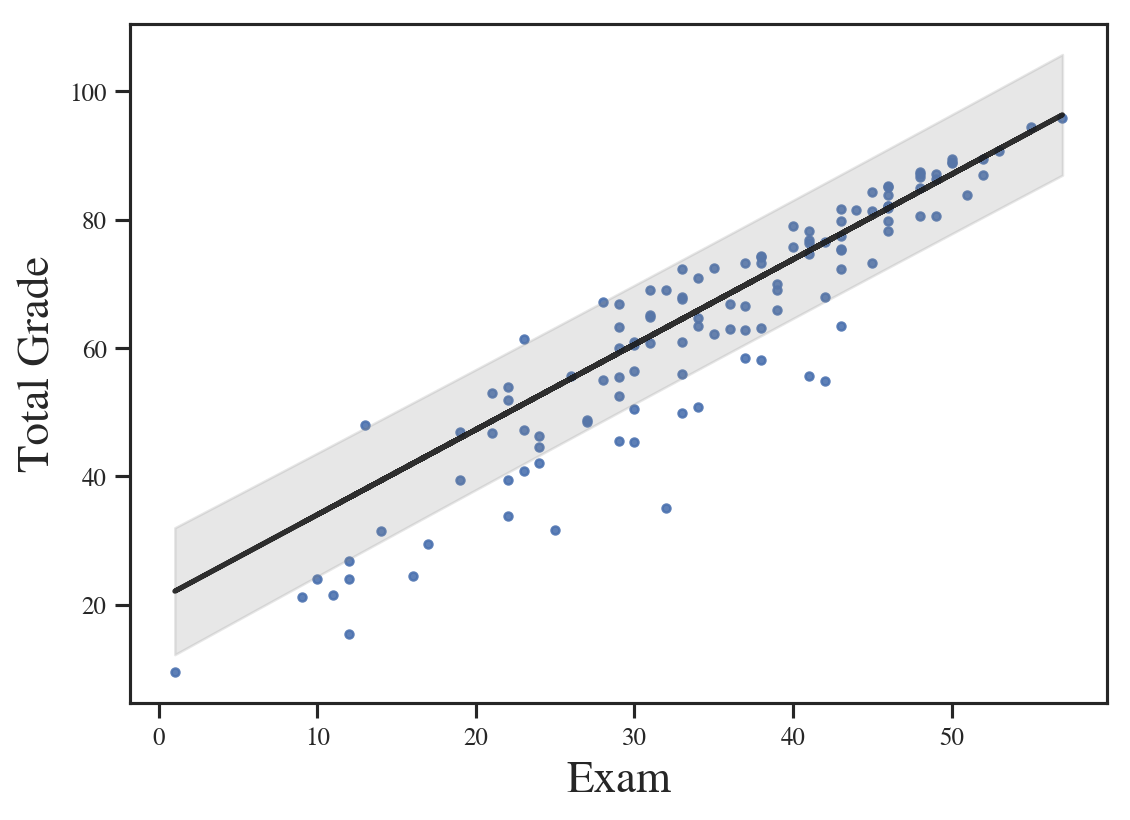

In [44]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#generate the model
mod = smf.ols(formula='Total ~ 1 + Exam', data=grades.dropna()).fit()

#extract the parameters for the confidence window
x_pred = np.linspace(grades.Exam.min(), grades.Exam.max(), len(grades.Exam))
x_pred2 = sm.add_constant(x_pred)

#confidence = 95% (alpha=0.05)
sdev, lower, upper = wls_prediction_std(mod, exog=x_pred2, alpha=0.05)

#plot points and confidence window
plt.scatter(grades.Exam, grades.Total, s=10, alpha=0.9)
plt.fill_between(x_pred, lower, upper, color='#888888', alpha=0.2)

#plot the regression line
plt.plot(grades.Exam, mod.predict(grades[['Exam']] ), 'k-', label='Linear n=1 $R^2$=%.2f' % mod.rsquared, alpha=0.9)

plt.xlabel('Exam')
plt.ylabel('Total Grade')

**Exercise:**: Draw 99% prediction bands for the prediction model you generated in the previous exercise.
        

Text(0,0.5,'Total Grade')

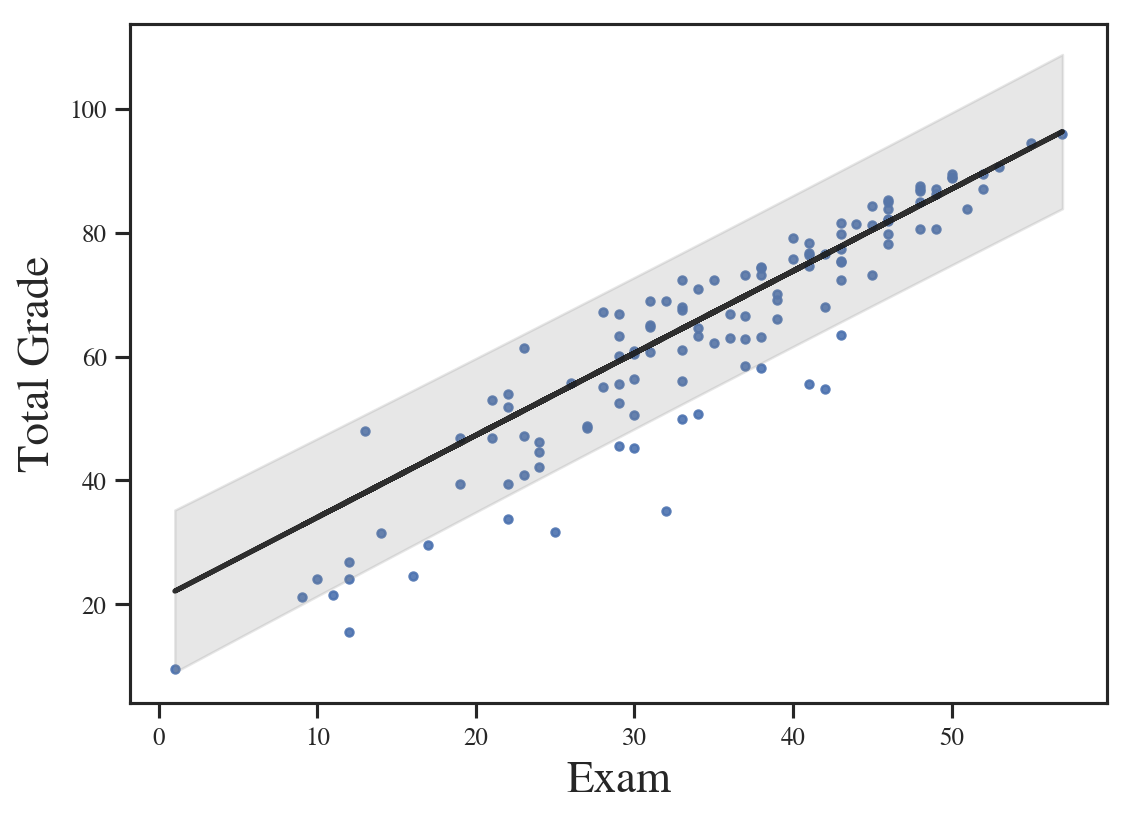

In [45]:
#confidence = 95% (alpha=0.05)
sdev, lower, upper = wls_prediction_std(mod, exog=x_pred2, alpha=0.01)

#plot points and confidence window
plt.scatter(grades.Exam, grades.Total, s=10, alpha=0.9)
plt.fill_between(x_pred, lower, upper, color='#888888', alpha=0.2)

#plot the regression line
plt.plot(grades.Exam, mod.predict(grades[['Exam']] ), 'k-', label='Linear n=1 $R^2$=%.2f' % mod.rsquared, alpha=0.9)

plt.xlabel('Exam')
plt.ylabel('Total Grade')

**Exercise:**: Calculate the RMSE for the above model and plot a figure that displays the spread of the residuals at one standard deviation from the regression line (covering some 68% of the predictions).

Sometimes it is useful to visualise the residuals in respect to the response variable, in oder to inspect the normality of their distribution and unusual shapes which might be indicative of non-normality.

The most useful way to plot the residuals, though, is with your predicted values on the x-axis, and your residuals on the y-axis.

**Exercise:**: Use a scatter plot to visualise the distribution of the residuals.

## Be Careful with Predictions

We have to be very careful to understand the difference between **extrapolation** and **interpolation**. The two are subtly different. Interpolation is concerned with predicting points within your range of data, which is what regression is designed to do.

Extrapolation is about making predictions that are outside the range of the data that your algorithm has been trained on. You must be very cautious of extrapolation. People extrapolate all the time. But if you're going to do it, you need to specify additional assumptions that make explicit your ignorance about what happens outside the data range.


---

---


## Fitting Linear and Polynomial models

We do not need to be restricted to a straight-line regression model. Despite its name, linear regression can be used to fit non-linear functions. A linear regression model is linear in the model parameters, not necessarily in the predictors. If you add non-linear transformations of your predictors to the linear regression model, the model will be non-linear in the predictors. For example we can represent a curved relationship between our variables by introducing **polynomial** terms. For example, a cubic model below can still be treated as a linear regression problem:

<div style="font-size: 150%;">  
$y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \beta_3 x_i^3 + \epsilon_i$
</div>


A very popular regression technique is [Polynomial Regression](http://en.wikipedia.org/wiki/Polynomial_regression) (a special case of multiple linear regression), a technique which models the relationship between the response and the predictors as an n-th order polynomial. The higher the order of the polynomial the more "wigglier" functions you can fit. Using higher order polynomial comes at a price, however. First, the computational complexity of model fitting grows as the number of adaptable parameters grows. Second, more complex models have a higher risk of **overfitting**. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.


The examples below from the 'student grade' prediction dataset will show how linear regression can be used to fit linear and polynomial models using the `ols` method found in the  `statsmodels.formula.api` module.

In [46]:
grades = pd.read_csv("../datasets/grades_prediction_mode.csv", index_col=0)
grades.head()

,A1,A2,A3,A4,A5,CW,Exam,Total,Grade,Mode
0,3.5,5.50,7.5,6.5,7.5,30.50,30.0,60.50,B-,INT
1,2.5,4.50,3.2,3.8,NaN,14.00,10.0,24.00,E,INT
2,4.0,5.25,7.1,10.2,11.5,38.05,31.0,69.05,B,INT
3,4.0,NaN,3.0,7.7,9.5,24.20,23.0,47.20,R,INT
4,4.5,4.75,7.4,10.3,8.8,35.75,40.0,75.75,B+,EXT


In [47]:
grades_no_NaN = grades.fillna(grades.mean())
grades_no_NaN.head()

,A1,A2,A3,A4,A5,CW,Exam,Total,Grade,Mode
0,3.5,5.500000,7.5,6.5,7.500000,30.50,30.0,60.50,B-,INT
1,2.5,4.500000,3.2,3.8,9.376263,14.00,10.0,24.00,E,INT
2,4.0,5.250000,7.1,10.2,11.500000,38.05,31.0,69.05,B,INT
3,4.0,4.712917,3.0,7.7,9.500000,24.20,23.0,47.20,R,INT
4,4.5,4.750000,7.4,10.3,8.800000,35.75,40.0,75.75,B+,EXT


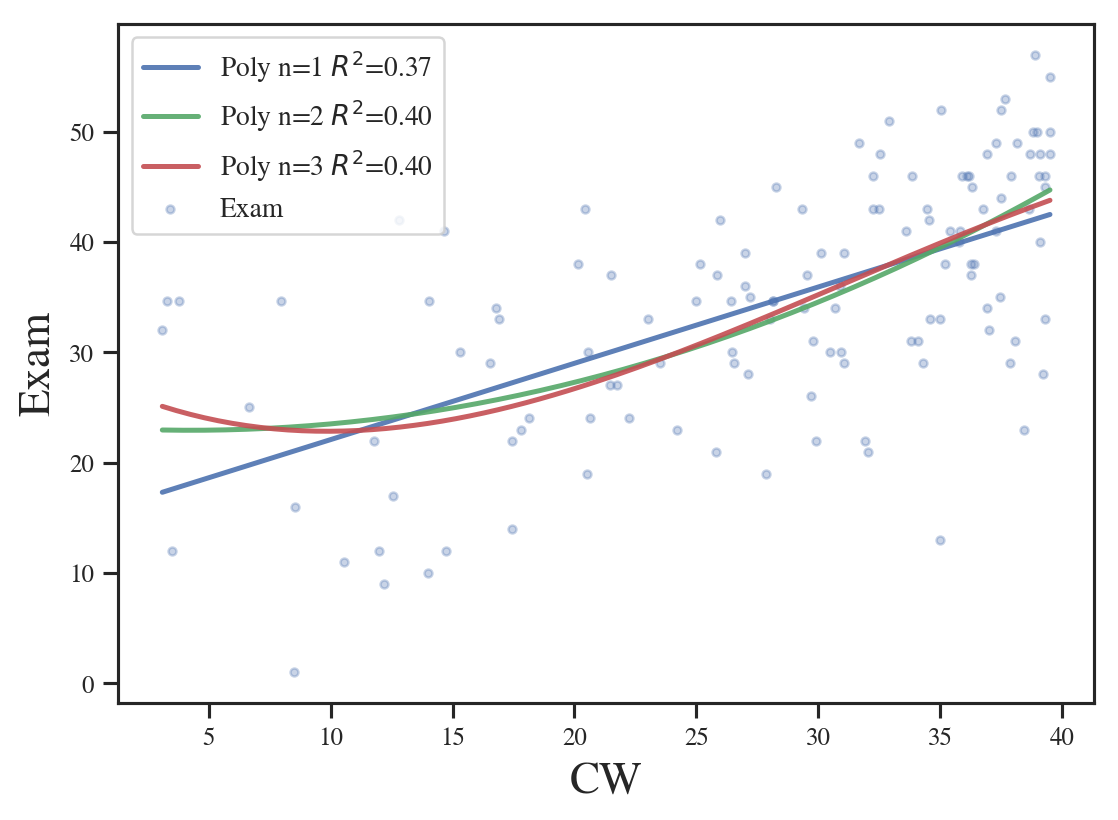

In [48]:
plt.scatter( grades_no_NaN.CW, grades_no_NaN.Exam, s=10, alpha=0.3)
plt.xlabel('CW')
plt.ylabel('Exam')

# points linearlyd space on lstats
x = pd.DataFrame({'CW': np.linspace(grades_no_NaN.CW.min(), grades_no_NaN.CW.max(), len(grades_no_NaN.CW)) })

# 1-st order polynomial
poly_1 = smf.ols(formula='Exam ~ 1 + CW', data=grades_no_NaN).fit()
plt.plot(x, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared,  alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='Exam ~ 1 + CW + I(CW ** 2.0)', data=grades_no_NaN).fit()
plt.plot(x, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='Exam ~ 1 + CW + I(CW ** 2.0) + I(CW ** 3.0)', data=grades_no_NaN).fit()
#=======================：y = x1**0 + x2**1 + x3**2 +x4**3
plt.plot(x, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()
#poly_1.mse_resid


**Exercise:** Describe the goodness-of-fit for each of the generated models. Which is better? Why?

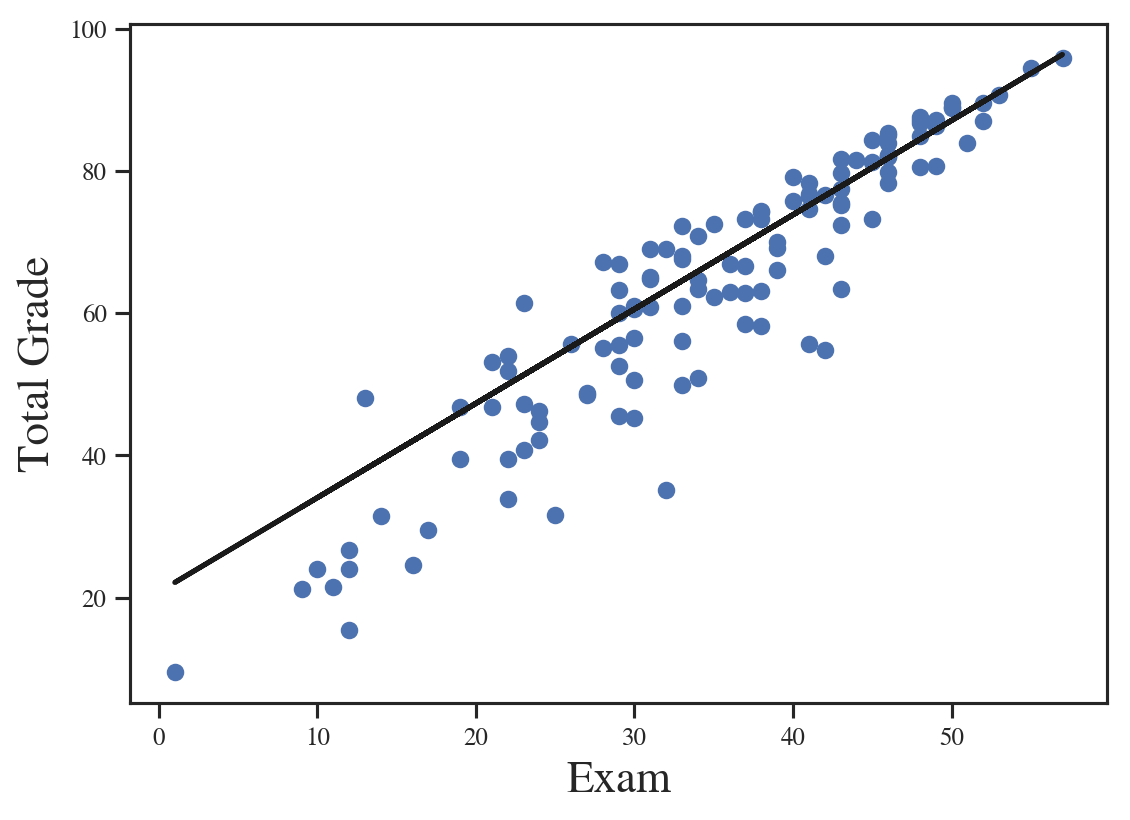

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     721.8
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           1.79e-44
Time:                        09:12:35   Log-Likelihood:                -267.14
No. Observations:                  91   AIC:                             538.3
Df Residuals:                      89   BIC:                             543.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.7912      1.922     10.817      0.000      16.972      24.610
Exam           1.3257      0.049     26.866      0.000       1.228       1.424
==============================================================================
Omnibus:                        2.126   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.761
Skew:                          -0.339   Prob(JB):                        0.415
Kurtosis:                       3.061   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
mod = smf.ols(formula='Total ~ 1 + Exam', data=grades.dropna()).fit()

plt.xlabel('Exam')
plt.ylabel('Total Grade')
plt.plot(grades.Exam,grades.Total, 'o')
plt.plot(grades.Exam, mod.params[1]*grades.Exam+mod.params[0],'k-')
# plt.fill_between(xd, yl, yu, alpha=0.3, facecolor='blue',edgecolor='none')
plt.show()
mod.summary()




**Exercise:** For each of the above three generated models, write code that predicts exam scores for students who score [4, 25, 40,100] in their course work:

In [49]:

print(poly_1.predict(pd.DataFrame(data=[4,25,40,100], columns=['CW'])))
print(poly_2.predict(pd.DataFrame(data=[4,25,40,100], columns=['CW'])))
print(poly_3.predict(pd.DataFrame(data=[4,25,40,100], columns=['CW'])))


0    17.933928
1    32.464421
2    42.843345
3    84.359039
dtype: float64
0     22.933934
1     30.478853
2     45.343229
3    183.760308
dtype: float64
0     24.518842
1     30.645058
2     44.175983
3   -129.369807
dtype: float64


**Exercise:** Attempt to create a polynomial model that better fits the data:

## Multiple linear regression

The above were examples of linear and polynomial regression models. One feature (predictor variable) and one prediction output (response variable). Below is an example of multiple linear regression. Several different features and one prediction output value.

In [50]:
grades_no_NaN

,A1,A2,A3,A4,A5,CW,Exam,Total,Grade,Mode
0,3.5,5.500000,7.50,6.50,7.500000,30.50,30.0,60.50,B-,INT
1,2.5,4.500000,3.20,3.80,9.376263,14.00,10.0,24.00,E,INT
2,4.0,5.250000,7.10,10.20,11.500000,38.05,31.0,69.05,B,INT
3,4.0,4.712917,3.00,7.70,9.500000,24.20,23.0,47.20,R,INT
4,4.5,4.750000,7.40,10.30,8.800000,35.75,40.0,75.75,B+,EXT
...,...,...,...,...,...,...,...,...,...,...
123,4.5,4.800000,4.00,7.25,11.500000,32.05,21.0,53.05,C,INT
124,4.0,3.000000,7.50,10.50,10.000000,35.00,33.0,68.00,B,INT
125,4.5,5.000000,6.05,10.40,9.250000,35.20,38.0,73.20,B,INT
126,4.5,5.500000,6.50,9.00,11.500000,37.00,32.0,69.00,B,INT


In [1]:
multi_linear = smf.ols(formula='Exam ~ 1 + A1 + A2 + A3', data=grades_no_NaN).fit()
print(multi_linear.params[0:4])
print('R-Squared: ', multi_linear.rsquared)
multi_linear.summary()

NameError: name 'smf' is not defined

**Exercise:** For the above generated model, write code that predicts exam scores for a student who scores 4,5,8 in their first 3 assignments:


**Exercise:** Experiment with a different combination of variables in order to generate a multiple linear regression model that better fits the data:

### Stepwise regression technique

Stepwise regression is often used to build models automatically when there is uncertainly about which subset of variables to use. The technique either begins with no variables (forward stepwise) and increasingly adds new best scoring variables according to a criterion (eg. p-value). Likewise, stepwise regression can begin with a full model that uses all available variables which are pruned step by step (backward stepwise) using a given criterion.

This technique is a heuristic only. It can assist in generating a good model though it is not guaranteed to return the best possible model. 

In [ ]:
grades.head()

In [ ]:
grades.columns

In [26]:
def stepwise_backwards_regression(response_var, exp_vars, df):
    while len(exp_vars) > 0:
        forml = response_var + ' ~ 1 +' + ' + '.join(exp_vars)
        print(forml)
        model = smf.ols(formula= forml, data=df).fit()

        sorted_ps = model.pvalues.sort_values(ascending=False).drop('Intercept')
        if (sorted_ps[0]) > 0.05:
            exp_vars = sorted_ps.index[1:].values
            drop = sorted_ps.index[0]
            print(str(len(exp_vars)) + ' var model AIC: ' + str(model.aic) + ', adj Rsq: ' + str(model.rsquared_adj))
            print('Dropped: ' + drop + ' with p-value ' + str(round(sorted_ps[0],3)))
        else:
            return model
    return model

In [27]:
mod = stepwise_backwards_regression('Total', [u'A1', u'A2', u'A3', u'A4', u'A5'], grades[[u'A1', u'A2', u'A3', u'A4', u'A5', 'Total']])

Total ~ 1 +A1 + A2 + A3 + A4 + A5
4 var model AIC: 675.438098152448, adj Rsq: 0.6779832691816583
Dropped: A1 with p-value 0.853
Total ~ 1 +A2 + A3 + A4 + A5


In [ ]:
mod.summary()

# Appendix - Calculate line of best fit using gradient descent

Calculating regression using gradient descent is an optimisation procedure. I entails calculating the gradient at a given point, and moving down the gradient at a certain step size. There are four key operations:

    1. Calculate the hypothesis h = X * theta (which tells us classification for each value of x)
    2. Calculate the loss = h - y and maybe the squared cost (loss^2)/2m (which tells us how far off we are giving us the error)
    3. Calculate the average gradient for all points = X' * loss / m
    4. Move in the direction of the downward sloping gradient by updating the parameters theta = theta - alpha * gradient
    
Code below gives an example of this and is adapted from http://stackoverflow.com/questions/17784587/gradient-descent-using-python-and-numpy

In [ ]:
grades.dropna()

In [ ]:
import random

# m denotes the number of examples here, not the number of features
def gradient_descent(x, y, theta, alpha, m, iterations):
    transpose_x = x.transpose()
    print('transpose_x:',transpose_x)
    print('theta:',theta)
    for i in range(0, iterations):
        print(i)
        hypothesis = np.dot(x, theta)
        #print('y:',y)
        #print('hypothesis:',hypothesis)
        loss = hypothesis - y
        #print('loss:',loss)
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        
        # avg gradient per example
        gradient = np.dot(transpose_x, loss) / m
        print('gradient:',gradient)
        # update
        print('- alpha * gradient', - alpha * gradient)
        theta = theta - alpha * gradient
        print('theta:',theta)
        if i % 1 == 0:
            plt.scatter(x[:,1], y)
            xs = np.arange( np.min(x[:,1]), np.max(x[:,1]))
            xs =  np.dstack( [np.ones(( len(xs), )), xs  ] )[0]
            plt.plot(xs[:,1], np.dot(xs, theta) ) 
    return theta


x, y = np.dstack( [np.ones(( len(grades.dropna()), )), grades.dropna().Exam ] )[0], grades.dropna().Total.values  
m, n = np.shape(x)
num_iterations= 15
alpha = 0.001
theta = np.ones(n)
print(theta)
theta = gradient_descent(x, y, theta, alpha, m, num_iterations)
print(theta)